<a href="https://colab.research.google.com/github/TaeYongGong/class2021Spring/blob/main/sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
1

1

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import IPython.display as ipd
import numpy as np
from scipy.signal import lfilter
# dir(ipd)
# dir(lfilter)

# Phasor

## **parameter setting**
----
- **amp**  -> ÏÜåÎ¶¨Ïùò ÌÅ¨Í∏∞ 
- **sr** -> sampling rate, Hz -> ÏñºÎßàÎßåÌÅº discreteÌïòÍ≤å Î∂ÑÏÑùÌï† Í≤ÉÏù∏Í∞Ä?/1Ï¥àÏóê Ïñ¥ÎäêÏ†ïÎèÑÏùò Ï†ïÎ≥¥Î•º Îã¥ÏùÑ Í≤ÉÏù∏Í∞Ä?
- **dur**  -> duration, in seconds
- **freq** = 100.0 -> sine frequency, Hz -> 1Ï¥àÏóê Î∞òÎ≥µÏù¥ Î™áÎ≤àÎêòÎäîÍ∞Ä?,ÏÜåÎ¶¨Ïùò ÎÜíÎÇÆÏù¥

## **sin(__) and time**
---
__ = Í∞ÅÎèÑÍ∞í in radian 

Ïù¥ Í∞íÏùÑ **theta(Í∞ÅÎèÑÍ∞í)**ÎùºÍ≥† Ï†ïÏùòÌï®. 
ÌïòÏßÄÎßå, **sin graph**ÏóêÎäî **ÏãúÍ∞Ñ**Í∞úÎÖêÏù¥ Îπ†Ï†∏ÏûàÎã§. 

ÏãúÍ∞ÑÏù¥ ÏóÜÏúºÎ©¥ ÏÜåÎ¶¨Ïùò Ïã§Ï≤¥Í∞íÏùÑ ÎßåÎì§ Ïñ¥ Ï§Ñ Ïàò ÏóÜÎã§. 

ÏãúÍ∞ÑÏù¥ÎùºÎäî Í∞úÎÖêÏùÑ ÎßåÎì§Ïñ¥Ï£ºÍ∏∞ ÏúÑÌï¥ÏÑú 
**Í∞ÅÎèÑÍ∞íÏù∏ phaseÏôÄ timeÏùÑ synchronizeÌï¥ÏïºÌïúÎã§.**

----

### **generate time**
**time = np.arange(1, $sr \times\ dur +1$)/sr**

1Ï∞®ÏõêÏùò  ÌñâÎ†¨, ÏãúÍ∞ÑÏùò Î¶¨Ïä§Ìä∏ 

- sr
- dur 
- (+1) sampling rateÏôÄ ÏùºÏπò

Sampling rateÎßåÌÅºÏùò time tik(Íµ¨Í∞Ñ)ÏùÑ ÎßåÎì§Ïñ¥ Ï§ÄÎã§. 


ex) if sr = 10000hz, dur =1

then, t = [$1/10000, 2/10000, 3/10000,
......1$]

if sr = 10000hz, dur = 0.5

then, t = [$1/10000, 2/10000, 3/10000,
......0.5$]

----

### **generate phase**
- $theta¬†=¬†t¬†\times\¬†2 \times\ np.pi¬†\times\¬†freq$

Í∞ÅÎèÑÍ∞íÏùÑ¬†timeÍ≥º¬†Ïó∞Îèô¬†ÏãúÏºúÏÑú¬†phasorÎ°ú¬†Î∞îÍøîÏ§òÏïºÌïúÎã§.

theta¬†=

- **t**¬†->¬†ÏãúÍ∞ÑÏùò¬†ÌñâÎ†¨¬†(Î≤°ÌÑ∞)
- **$2 \times\ np.pi$**¬†=¬†2ùùÖr = 360ÎèÑ ->¬†**ÌïòÎÇòÏùò¬†Ï£ºÍ∏∞***
    - **np.pi**¬†=¬†1ùùÖ<90ÎèÑ>
    - ***xÏ∂ï**Ïùò¬†Í∞íÏù¥Îã§.
- **freq**¬†=¬†Î™á¬†Î∞îÌÄ¥Î•º¬†ÎßåÎìúÎäêÎÉê?

    ->¬†**Ï£ºÍ∏∞Î•º¬†ÏÑ§Ï†ï**

**Í≤∞Î°†**

**Í∞ÅÎèÑÍ∞íÏù∏ phaseÏôÄ timeÏùÑ synchronizeÎê®**

- **$2 \times\ np.pi\times\ freq$**¬†ÏùÄ¬†360ÎèÑÎ°ú¬†ÌöåÏ†ÑÌïòÎäî¬†Í≤ÉÏùÑ¬†frequencyÎßåÌÅº¬†Î∞òÎ≥µÌïòÍ≥† <**ÏÇ¨Ïù∏Í∑∏ÎûòÌîÑÎ•º¬†frequencyÎßåÌÅº**¬†>
- Ïó¨Í∏∞Îã§Í∞Ä¬†**$\times\ t$**Î•º¬†Ìï¥ÏÑú¬†ÏãúÍ∞ÑÏùò¬†Í∞úÎÖêÏùÑ¬†Ï∂îÍ∞Ä **<Íµ¨Í∞ÑÏùÑ¬†ÎÇòÏõåÏ£ºÎäî¬†Í≤É>**
- Í∑∏Í≤ÉÏùÑ¬†**dur**ÎèôÏïà¬†**(2np.pi*freqÏù† sin graphÎ•º sampling rateÎßåÌÅºÏùò Íµ¨Í∞ÑÏúºÎ°ú¬†ÎÇòÎàà¬†Îí§¬†durÎßåÌÅº)**
- Í≤∞Íµ≠ÏóêÎäî Ï¶â,¬†**thetaÍ∞Ä¬†phaseÍ∞Ä¬†ÎêúÎã§.¬†->¬†Ïù¥Îäî¬†phasorÎ°ú¬†ÎßåÎì§Ïñ¥¬†Ï§Ñ¬†Ïàò¬†ÏûàÏùå**
- *tÎäî¬†arangeÏù¥Í≥†¬†ÎÇòÎ®∏ÏßÄÎäî¬†Í≥±ÌïòÎäî¬†ÏÉÅÏàò( timeÏùò¬†Î≤°ÌÑ∞Ïùò¬†ÏÇ¨Ïù¥Ï¶àÏôÄ¬†thetaÏùò¬†Î≤°ÌÑ∞Ïùò¬†ÏÇ¨Ïù¥Ï¶àÎäî¬†Í∞ôÎã§.¬†)*

---
### **generate signal by cosine-phasor**
**s = np.sin(theta)**
- ÏãúÍ∞ÑÏù¥ÎùºÎäî Í∞úÎÖêÏù¥ Î∞òÏòÅÎêú thetaÍ∞íÏùÑ Î≥ÄÏàòÎ°úÌïòÎäî sin-graph

s = $amp \times\ np.sin(theta)$
- **amp= yÏ∂ïÏùò ÌÅ¨Í∏∞Î•º ÎäòÎ†§Ï§å**
- ÏßÑÌè≠Ïù¥ 2Î°ú ÎäòÏñ¥ÎÇ®( -1*x / 1*xÎ°ú xÏ∂ïÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÎåÄÏπ≠Ï†ÅÏúºÎ°ú Ïª§Ïßê)

---
### **graph**
**fig = plt.figure()** 

- figÎùºÎäî functionÏùÑ Ï†ïÏùò

**ax = fig.add_subplot(111)** 

- ax = fig.add_subplot(221) ‚Üí 2*2Î°ú ÌôîÎ©¥ÏùÑ Î∂ÑÎ¶¨<4Í∞úÏùò ÌôîÎ©¥ÏùÑ Ï∂úÎ†•>Î•º ÌïòÍ≥† Í∑∏ Ï§ë Ï≤´Î≤àÏ®∞ Í≤ÉÏùÑ ÏÑ†ÌÉù
- ax = fig.add_subplot(222) ‚Üí 2*2Î°ú ÌôîÎ©¥ Î∂ÑÎ¶¨ / 2Î≤àÏß∏ ÏÑ†ÌÉù
- fig.add_subplot(111) ‚Üí 1*1Î°ú ÌôîÎ©¥ Î∂ÑÎ¶¨/ 1Î≤àÏß∏ ÏÑ†ÌÉù

**ax.plot(t[0:1000], s[0:1000], '.')**
- sin Í∑∏ÎûòÌîÑ ÌòïÌÉú
- xÏ∂ïÏùÄ time
- sÎäî sinÏù¥ÎùºÎäî functionÏóêÏÑú ÎÇòÏò® Í≤∞Í≥ºÍ∞í ‚Üí yÏ∂ï
- []ÏùÄ ÏùºÎ∂ÄÎßå -> singraphÏùÑ Ìïú ÎààÏóê Î≥¥Í∏∞ Ìé∏ÌïòÍ≤å 
- .ÏùÄ Í∑∏ÎûòÌîÑÏùò ÌòïÌÉú('.' or '-' ÏùòÌòïÌÉú)

----
## **generate signal by complex-phasor**
## **c = np.exp(theta*j)**

### **theta**($\theta):np.pi\times\ k$
- kÍ∞Ä 2Î©¥ sin graphÏóêÏÑú ÌïòÎÇòÏùò Ï£ºÍ∏∞ = $2\pi\$
  
  - = np.sin($2\pi\$) 

- Ïö∞ÏÑ† Ïó¨Í∏∞Ïóê Î™á Î≤à Î∞òÎ≥µÌï†ÏßÄÎ•º ÏÑ§Ï†ï = **freq**
  - Ïù¥Í≤ÉÏù¥ **pitch**Ïù¥Îã§.

- Ïó¨Í∏∞Ïóê **ÏãúÍ∞ÑÏùÑ ÎèôÍ∏∞Ìôî**
  - sin graphÏùÑ Ï†êÏúºÎ°ú discreteÌïòÍ≤å ÎÇòÎàÑÎäî Í≤É 
  - Ïù¥ Ï†ê ÌïòÎÇòÍ∞Ä ÌïòÎÇòÏùò ÏãúÍ∞ÑÏùÑ Î∞òÏòÅÌïúÎã§. = **array t**ÏóêÏÑúÎäî ÏõêÏÜå Ï§ë ÌïòÎÇò
    - sampling frequency = 1000Ïù¥Î©¥ Ï†ê ÌïòÎÇòÎäî $\frac{1}{1000}$Ïùò ÏãúÍ∞ÑÏùÑ ÎúªÌïúÎã§. 
    - **array t**ÏóêÏÑúÎäî ÏãúÍ∞ÑÏù¥ ÏßÄÎÇòÍ∞ÄÎäî Í≤ÉÏùÑ $\frac{x}{1000}$ÏóêÏÑú $x$Í∞íÏù¥ Ï¶ùÍ∞ÄÌïòÎäî Í≤ÉÏúºÎ°ú Î≥ÄÌôò

**k = 2 x time array Í∞Ä ÎêòÍ≥†  $theta$Îäî ÏãúÍ∞ÑÏùò Í∞úÎÖêÏù¥ Îì§Ïñ¥ÏûàÎäî $radian$Í∞íÏù¥ ÎêúÎã§**

---
## ÏàòÌïô Í∞úÎÖê

### **Î≥µÏÜåÏàò**
- $a$(Ïã§Ïàò)+$bi$(ÌóàÏàò)
- Ïã§Ïàò xÏ∂ïÍ≥º ÌóàÏàò yÏ∂ïÏúºÎ°ú ÎêòÏñ¥ÏûàÎäî Î≥µÏÜåÌèâÎ©¥ ÏúÑÏùò ÌïúÏ†êÏúºÎ°ú ÎÇòÌÉÄÎÇº Ïàò ÏûàÏùå
  - Î≥µÏÜåÏàò Í∞íÏóê $i$Î•º Í≥±ÌïòÎ©¥ Î≥µÏÜåÌèâÎ©¥ ÏÉÅÏóêÏÑú ÏôºÏ™ΩÏúºÎ°ú 90ÎèÑ ÌöåÏ†Ñ, $i^2$ÏùÑ Í≥±ÌïòÎ©¥ ÏôºÏ™ΩÏúºÎ°ú 90ÎèÑ ÌöåÏ†Ñ
  - $-i$Îäî Ïò§Î•∏Ï™Ω 90ÎèÑ, $(-i)^2\$ÏùÄ Ïò§Î•∏Ï™ΩÏúºÎ°ú 180ÎèÑ



### **Ïò§ÏùºÎü¨ Í≥µÏãù**
$e^{i\theta} = \cos\theta + \sin\theta\ i$
- Î≥µÏÜåÏàò ÌòïÌÉú
- $e$ ÏûêÏó∞ÏÉÅÏàò, $i$ ÌóàÏàò, $cos$, $sin$ÏúºÎ°ú Ïù¥Î§ÑÏ†∏ ÏûàÏùå 
- $cos$ÏùÑ xÏ∂ïÏúºÎ°ú $sin$ÏùÑ yÏ∂ïÏúºÎ°ú Ìï¥ÏÑú Í∑∏ÎûòÌîÑÎ°ú ÌëúÌòÑÍ∞ÄÎä•

### **ÏûêÏó∞ÏÉÅÏàò**
-  $\lim_{dt\to0} \frac {e^{dt} - 1}{dt} = 1$ÏùÑ ÎßåÏ°±ÌïòÎäî Ïàò 
- ÎπÑÎ°ÄÏÉÅÏàò(Ï¶ùÍ∞ÄÏú®)Í∞Ä 1Ïù∏ Î∞ë 
- $e = lim_{n\to\infty}(1+ \frac {1}{n})^n
= lim_{n\to0}(1+ x)^\frac {1}{x}$
- Îî∞ÎùºÏÑú $e^{i} = lim_{n\to\infty}(1+ \frac {i}{n})^n$
  - cf) ÏûêÏó∞Î°úÍ∑∏Îäî $e^{ln(n)} = n$(nÏù¥ ÏûêÏó∞ÏàòÏùºÎïå)

--- 
- $A = 1+i$
  - $\theta\ = \pi\ /4$ 
  - $A^2 = 2i$
    - $\theta\ = \pi\ /2$ 
      - ....
- Î≥µÏÜåÌèâÎ©¥ÏÉÅÏóêÏÑú $(0,0*i)$ÏóêÏÑú $a+bi$ÍπåÏßÄ Í∏∏Ïù¥Î•º $l$ÎùºÍ≥† Ìï†Îïå Ïù¥Ïóê ÎåÄÌïú ExponentialÏùÄ $l$ÏùÄ Ïú†ÏßÄÌïúÏ±ÑÎ°ú $theta$Í∞íÎßå ÎπÑÎ°ÄÏ†ÅÏúºÎ°ú Î∞îÎÄê Ï†êÏúºÎ°ú Ïù¥ÎèôÌïúÎã§. 

- so, $e^{\theta\ i}$ÏóêÏÑú $l$Ïùò Í∞íÏùÑ 1Î°úÌïòÍ≥† $\theta\$Í∞íÎßå Î∞îÍøîÏ£ºÎ©¥ Î≥µÏÜåÌèâÎ©¥ÏÉÅÏóêÏÑú Îã®ÏúÑÏõêÏù¥ Í∑∏Î†§ÏßÑÎã§.
---

- $e^{i}$Ïùò Í∞íÏùÑ Î≥µÏÜåÌèâÎ©¥ÏÉÅÏóê Í∑∏Î¶∞Îã§Í≥† ÏÉùÍ∞ÅÌï¥Î≥∏Îã§Î©¥
Ïù¥Îäî nÏù¥ Ïª§Ïßà ÏàòÎ°ù $e^{i}$Îäî Î∞òÏßÄÎ¶ÑÏù¥ 1Ïù¥Í≥† Í∏∏Ïù¥Í∞Ä 1Ïù∏ Ìò∏ ÏúÑÏùò Ï†êÏù¥ Í∑∏Î†§ÏßÑÎã§. 

- Ïó¨Í∏∞Ïóê $\theta\$Í∞íÏùÑ Ï∂îÍ∞ÄÌï¥Ï£ºÎ©¥ 

- **Í≤∞Íµ≠ $e^{i\theta}$ Î∞òÏßÄÎ¶ÑÏù¥ 1Ïù¥Í≥† Í∞ÅÎèÑÍ∞Ä  $\theta$(rad)Ïù∏ Ìò∏ ÏúÑÏùò Ï†êÏùÑ ÏùòÎØ∏ÌïòÍ≤å ÎêòÎ©∞  Ïù¥Î•º Î≥µÏÜåÌèâÎ©¥ÏÉÅÏùò Îã®ÏúÑÏõêÏùÑ Í∑∏Î¶∞Îã§Í≥† ÏÉùÍ∞ÅÌïòÎ©¥  $\cos\theta + \sin\theta\ i$ÎùºÎäî Í≥µÏãùÏùÑ Ïú†ÎèÑÌï† Ïàò ÏûàÎã§.**

---
-> ex)
$e^{\pi\ i } + 1 = 0 $

---

### **np.exp(theta * j)** 
- np.exp(x)Ìï®Ïàò = Î∞ëÏù¥ $e$Ïù∏ $y=e^x$ÏúºÎ°ú Î≥ÄÌôò
- Ïó¨Í∏∞ÏÑú jÎäî ÌóàÏàò $i$Îã§ 
  - thetaÎßå ÏûÖÎ†•ÏùÑ Îì§Ïñ¥Í∞ÑÎã§.ÎÇòÎ®∏ÏßÄÎäî Í≥†Ï†ï
- ÏúÑÏùò Í≥µÏãùÏùÑ Ï†ÅÏö©ÌïòÎ©¥ $\cos\theta + \sin\theta\ i$ Í∞íÎì§Ïùò arrayÎ°ú Íµ¨ÏÑ±ÎêúÎã§. 


## graph 
- ÏãúÍ∞ÑÏùò Í∞úÎÖêÏù¥ Îì§Ïñ¥ÏûàÎäî $rad$Í∞í $theta$Í∞Ä Î∞òÏòÅÎêú Ïò§ÏùºÎü¨ Í≥µÏãùÏóêÏÑú **Î≥ÄÏàò $t$**Í∞íÏóê Îî∞Îùº Îã¨ÎùºÏßÄÎäî $e^{i\theta}$ÏùÑ Ïã§ÏàòÎ∂ÄÎ∂ÑÍ≥º ÌóàÏàò Î∂ÄÎ∂ÑÏúºÎ°ú ÎÇòÎà† Ï∂îÏ∂úÌïòÎ©¥ **3Ï∞®Ïõê Î≤°ÌÑ∞**Î°ú ÎßåÎì§Ïñ¥ Ï§Ñ Ïàò ÏûàÎã§.
- Ïù¥Î•º Í∑∏ÎûòÌîÑÎ°ú ÌëúÌòÑÌïòÎ©¥ **x(time, from time array),y($\cos$ = c.real),z($\sin$, c.imag)Ï∂ï**ÏúºÎ°ú Ïù¥Î§ÑÏßÑ 3Ï∞®ÏõêÏùò Í∑∏ÎûòÌîÑÎ•º ÎßåÎì§Ïñ¥Ï§Ñ Ïàò ÏûàÎã§.
  - Ï¢åÌëúÌèâÎ©¥Í≥º Î≥µÏÜåÌèâÎ©¥Ïùò Í≤∞Ìï©
- Ïù¥ Î™®Îì† Í∞íÏùÄ thetaÍ∞íÏóê Ï¢ÖÏÜçÎêòÏñ¥ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Ï†ÑÎ∂Ä -1ÏóêÏÑú 1ÏÇ¨Ïù¥Ïùò Í∞íÏùÑ Í∞ÄÏßÑÎã§. 

3d Í∑∏ÎûòÌîÑ Î∂ÑÏÑù

- timeÍ≥º imag => sin graph
- timeÍ≥º real -> cos graph
- realÍ≥º imag -> Î≥µÏÜåÌèâÎ©¥ÏÉÅÏùò Îã®ÏúÑÏõê 




In [11]:
# parameter setting
# -> Í∞íÎßå Îã§Î•¥Í≤å Î∞îÏù∏Îî©ÌïòÎ©¥ Í≤∞Í≥ºÍ∞í(ÏÜåÎ¶¨)Í∞Ä Îã¨ÎùºÏßÑÎã§. 
amp = 1         # range [0.0, 1.0] -> ÏÜåÎ¶¨Ïùò ÌÅ¨Í∏∞ 
sr = 10000       # sampling rate, Hz -> ÏñºÎßàÎßåÌÅº discreteÌïòÍ≤å Î∂ÑÏÑùÌï† Í≤ÉÏù∏Í∞Ä?/1Ï¥àÏóê Ïñ¥ÎäêÏ†ïÎèÑÏùò Ï†ïÎ≥¥Î•º Îã¥ÏùÑ Í≤ÉÏù∏Í∞Ä?
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz -> 1Ï¥àÏóê Î∞òÎ≥µÏù¥ Î™áÎ≤àÎêòÎäîÍ∞Ä?,ÏÜåÎ¶¨Ïùò ÎÜíÎÇÆÏù¥

In [12]:
# generate time
t = np.arange(1, sr * dur+1)/sr

In [13]:
# generate phase
theta = t * 2*np.pi * freq   

In [14]:
# generate signal by cosine-phasor
s = amp*np.sin(theta)

Text(0, 0.5, 'real')

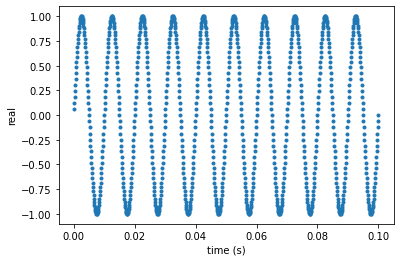

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.plot(theta, s, '.')
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [17]:
ipd.Audio(s, rate=sr)
# ÏÜåÎ¶¨Î•º Îì§Î†§Ï£ºÎäî Ìï®Ïàò<audioÎùºÎäî functionÏùÑ Í∞ÄÏ†∏Ïò®Îã§.>
# ÏÜåÎ¶¨Î°ú ÎßåÎì§Ïñ¥ Ï£ºÍ≥† Ïã∂ÏùÄ Í∑∏ÎûòÌîÑ<c or s Îì±>Í≥ºsampling rateÏù¥ ÌïÑ

In [18]:
# generate signal by complex-phasor
c = amp*np.exp(theta*1j)

Text(0.5, 0, 'imag')

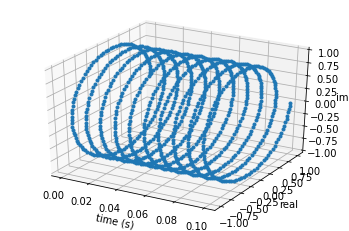

In [19]:
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [23]:
import plotly.graph_objects as go
import numpy as np

x, y, z = t[0:200], c.real[0:200], c.imag[0:200]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [29]:
ipd.Audio(c.imag, rate=sr)

In [30]:
def phasor_sine(amp, sr, dur, freq):

  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq   
  s = amp*np.sin(theta)

  return s, t, theta

In [31]:
amp = 1; sr = 10000; dur = 1; freq = 300
s, t, theta = phasor_sine(amp, sr, dur, freq)
ipd.Audio(s, rate=sr)

In [34]:
def phasor_complex(amp, sr, dur, freq):

  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq   
  c = amp*np.exp(theta*1j)
# ÏúÑÏóêÏÑú ÎÇòÎàà Ï≤òÎ¶¨Îì§ÏùÑ ÌïòÎÇòÏùò functionÏúºÎ°ú ÌÜµÌï©Ìï¥ÏÑú Ïã§ÌñâÌïúÎã§.

  return c, t, theta
# Î∞ëÏóêÏÑúÎäî complex numberÏûêÏ≤¥Î•º returnÌï¥Ï§ÄÎã§. 
# ipd.AudioÏóêÏÑúÎäî cÍ∞Ä ÏïÑÎãàÎùº c.imag sinÍ∞í, c.real cosÍ∞íÏùÑ ÏÇ¨Ïö©ÌïúÎã§. 

In [35]:
amp = 1; sr = 10000; dur = 1; freq = 300.0
c, t, theta = phasor_complex(amp, sr, dur, freq)
ipd.Audio(c.imag, rate=sr)

In [36]:
amp = 1; sr = 10000; dur = 1; freq = 300.0
c, t, theta = phasor_complex(amp, sr, dur, freq)
ipd.Audio(c.real, rate=sr)

# **Generate pulse train(=source)**

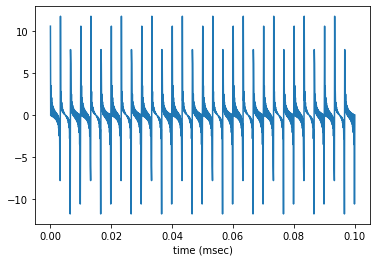

In [38]:
# parameter setting
amp = 1
sr = 10000
dur = 0.5

F0 = 300
Fend = int(sr/2)
# f0Îäî Í∞ÄÏû• ÎÇÆÏùÄ frequencyÏù¥Îã§. Ïù¥ÏóêÎåÄÌïú harmonicsÏùÑ ÎßåÎì§Ïñ¥Ï§ÄÎã§. 
# Fend -> ÌëúÌòÑÌïòÎäî Ï†úÏùº ÎßàÏßÄÎßâ Ï£ºÌååÏàò.-> 5000ÍπåÏßÄÍ∞Ä Ïö∞Î¶¨Í∞Ä ÌëúÌòÑÌï† Ïàò ÏûàÎäî Í∞ÄÏ≤≠ Ï£ºÌååÏàòÏù¥Îã§. Ïù¥Îäî floatÏù¥Í∏∞ ÎïåÎ¨∏Ïóê rangeÏóêÏÑú Ïì∞Í∏∞ÏúÑÌï¥ÏÑú intÏ≤òÎ¶¨

s_all = 0
# Ïó¨Í∏∞ÏÑú sÍ∞íÏùÄ Í∞ÄÏû• Ï¥àÍ∏∞Ïùò sÍ∞íÏù¥Îã§.-> Í∑∏ÎÉ• sÍ∞íÏùÑ 0ÏúºÎ°ú Ï†ïÌï¥Ï£ºÎäî Ìï®Ïàò
for freq in range(F0, Fend+1, F0):
  # F0Î∂ÄÌÑ∞ FendÍπåÏßÄ F0Ïùò harmonics(F0Ïùò Î∞∞Ïùå)Îì§Î°ú Ïù¥Î§ÑÏßÑ range 
  s, t, theta = phasor_sine(amp, sr, dur, freq)
  s_all += s
  # sÍ∞íÏùÑ Í≥ÑÏÜçÌï¥ÏÑú ÏóÜÎç∞Ïù¥Ìä∏

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s_all[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s_all, rate=sr)

In [ ]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [ ]:
RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 500  # RG is the frequency of the Glottal Resonator
BWG = 60  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 2500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 3500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)

# load wav

In [ ]:
from scipy.io import wavfile
# sr, s = wavfile.read('a.wav')
nSamp = len(s)
dur = nSamp / sr
t = np.linspace(1/sr, dur, nSamp)

# Fourier tranform

In [ ]:
nFFT = nSamp
amp = [];
for n in range(0,nFFT):
    omega = 2*np.pi*n/nFFT # angular velocity
    z = np.exp(omega*1j)**(np.arange(0,nSamp))
    amp.append(np.abs(np.dot(s,z)))

Text(0, 0.5, 'amplitude')

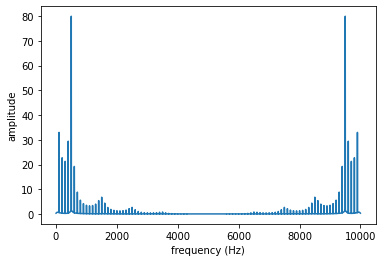

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
freq = np.arange(1,nFFT+1)*sr/nFFT;
ax.plot(freq, amp)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')

# define helper functions

In [ ]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

def get_window(win_size, srate, win_type, win_samp=None):
    '''Get window samples for win_size'''
    if win_samp is None:
        win_samp = int(win_size * srate)  # sec -> sample

    if win_type == 'rect':
        return np.kaiser(win_samp, 0)
    elif win_type == 'hamming':
        return np.hamming(win_samp)
    elif win_type == 'hanning':
        return np.hanning(win_samp)
    elif win_type == 'kaiser':
        return np.kaiser(win_samp, 14)
    elif win_type == 'blackman':
        return np.blackman(win_samp)

def plot_spectrogram(S):
    fig, ax = plt.subplots(facecolor='white', figsize=(14, 6))
    im = ax.imshow(S.T, aspect='auto', origin='lower', cmap=plt.get_cmap('Greys'))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    return fig, ax

def preemphasis(s, pre_emp=0.97):
    # Emphasize high frequency range of the waveform by increasing power(squared amplitude).
    s = lfilter([1, -pre_emp], [1], s)
    return s

# preprocessing signal

In [ ]:
max_freq = None  # cutoff freq
win_size = 0.008 # sec
win_step = 0.001  # sec
win_type = 'hanning' # options: 'rect', 'hamming', 'hanning', 'kaiser', 'blackman'
nfft = 1024

# Emphasize signal
s = preemphasis(s)
# Frame signal
frames = frame_signal(s, sr, win_size, win_step)
# Apply window function
frames *= get_window(win_size, sr, win_type)
print('frames:', frames.shape)

frames: (492, 80)


(<Figure size 1008x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c2140e358>)

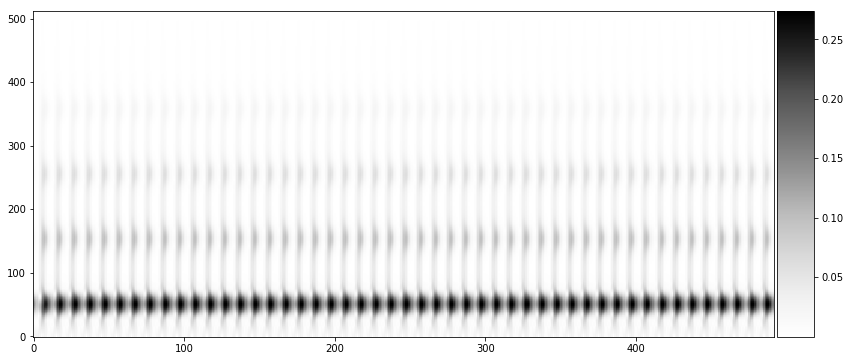

In [ ]:
magspec = np.abs(np.fft.rfft(frames, n=nfft)) # frames x (nfft//2 + 1)
plot_spectrogram(magspec)

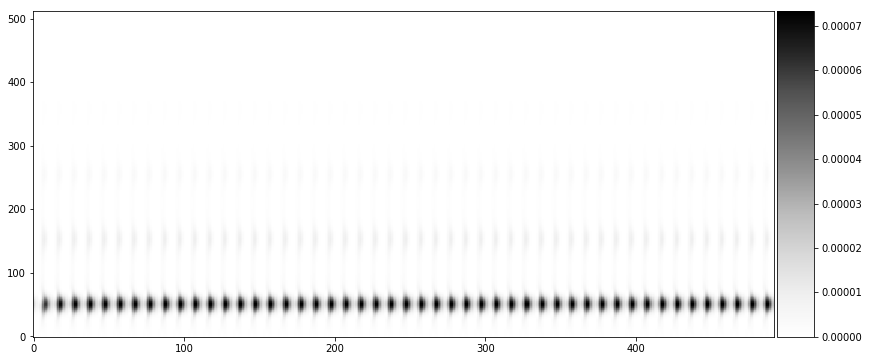

In [ ]:
powspec = 1/nfft * (magspec**2)
plot_spectrogram(powspec);

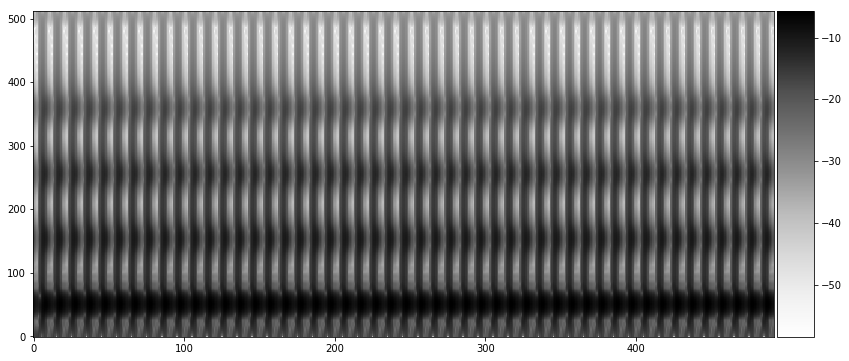

In [ ]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);

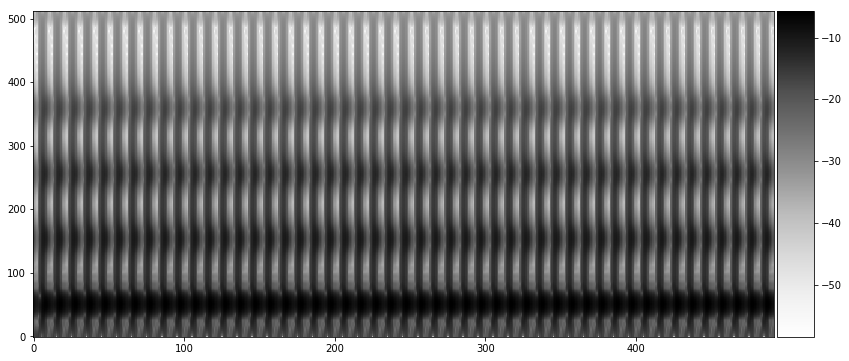

In [ ]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);